## Importing necessary libraries

In [7]:
import pandas as pd
import re
import inflect
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
import spacy
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Reading in the corpus

In [31]:
reviews = pd.read_csv("./train_labelled.csv", encoding = 'unicode_escape')
reviews.head()

,Restaurant,Review,Label,Stars,Date
0,Happy Tummy,"Fresh ingredients, friendly peeps and so much ...",1,5,2016-04-06T00:00:00
1,Cibo Italiano,A small selection of Italian wines by the glas...,1,4,2015-12-24T00:00:00
2,Yan kee Noodle House,The plus point is that the price remains the s...,1,4,2018-12-28T00:00:00
3,Clinton Street Baking Company & Restaurant,Same for more?I ordered what I thought was the...,1,2,2018-03-03T00:00:00
4,Brawn & Brains Coffee,I don't get why it can't just be full service....,1,3,2019-12-17T00:00:00


In [32]:
reviews.tail()

,Restaurant,Review,Label,Stars,Date
3373,Ah Tai Hainanese Chicken Rice,the original plan was to go to both ah tai and...,5,4,2014-12-09T00:00:00
3374,Sawadee Thai Cuisine,Menu is beautiful.,5,5,2017-01-21T00:00:00
3375,StraitsKitchen,"Last year during ramadan, they invited an Egyp...",5,4,2012-07-29T00:00:00
3376,Ippudo,They also have umeshu cocktail which i would t...,5,5,2013-12-27T00:00:00
3377,Annalakshmi,There is a decent selection to choose from.,5,4,2018-12-24T00:00:00


In [33]:
reviews.isnull().any()

Restaurant    False
Review        False
Label         False
Stars         False
Date          False
dtype: bool

In [34]:
reviews.shape

(3378, 5)

## Data cleaning

In [18]:
# Cleaning the Data
def clean(data):

    # Removing leading and trailing white spaces
    data = str(data).strip()
    
    # Converting all text to lower case
    data = data.lower() 
    
    # add space for punctuation
    translator = re.compile('[%s]' % re.escape(string.punctuation))
    translator.sub(' ', data)

    #remove punct
    data = re.sub('[^A-Za-z0-9]+', ' ', data)
    
    #keep english words
    data = re.sub(r'[^\x00-\x7F]+', '', data)
    
    #keep printable
    data = re.sub(f'[^{re.escape(string.printable)}]', '', data)

    # Removing Stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(data)

    # Converting all text to base form
    lemmatizer = WordNetLemmatizer()
    tokens_lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
            
    # Removing Punctuation
#     translator = str.maketrans('', '', string.punctuation)
#     data = data.translate(translator)

    # Removing all the numbers
#     word = data.split(' ')
#     #p = inflect.engine()
#     #p.number_to_words(word)
#     word = ' '.join([i for i in word if not i.isdigit()])
#     word = re.sub(r'\d+','' , word)

         # Converting all numbers to words
#    word = data.split(' ')
#     p = inflect.engine()
#     word = ' '.join([i for i in word if not i.isdigit()])
#     word = re.sub(r'\d+', p.number_to_words(word) , word)  

    # Removing all the odd characters with the aprostroe etc
#     word = re.sub(r'([^\s\w]|_)+', "", word)
#     word = re.sub(r'ý+', '', word)

    word = ' '.join([i for i in tokens])

    return word

# clean text data
reviews["Review_clean"] = reviews["Review"].apply(lambda x: clean(x))
reviews

,Restaurant,Review,Label,Stars,Date,Review_clean,enum_restaurant
0,Happy Tummy,"Fresh ingredients, friendly peeps and so much ...",1,5,2016-04-06T00:00:00,fresh ingredients friendly peeps and so much c...,0
1,Cibo Italiano,A small selection of Italian wines by the glas...,1,4,2015-12-24T00:00:00,a small selection of italian wines by the glas...,1
2,Yan kee Noodle House,The plus point is that the price remains the s...,1,4,2018-12-28T00:00:00,the plus point is that the price remains the s...,2
3,Clinton Street Baking Company & Restaurant,Same for more?I ordered what I thought was the...,1,2,2018-03-03T00:00:00,same for more i ordered what i thought was the...,3
4,Song Fa Bak Kut Teh,I will probably get that again.Have been very ...,5,5,2019-01-05T00:00:00,i will probably get that again have been very ...,4
...,...,...,...,...,...,...,...
2825,Buona Terra,We went there in a weekday night.,5,4,2013-07-14T00:00:00,we went there in a weekday night,389
2826,Bigmama,Came here for a birthday celebration with my m...,5,4,2015-09-04T00:00:00,came here for a birthday celebration with my m...,480
2827,Tapas Club,Caters to vegetarians too.,5,5,2018-11-10T00:00:00,caters to vegetarians too,462
2828,Tolido's Espresso Nook,My friend really wanted to come back to try th...,5,5,2019-07-21T00:00:00,my friend really wanted to come back to try th...,114


In [9]:
# Write to a clean csv file
reviews.to_csv('train_cleaned.csv')

## Exploratory Data

In [11]:
restaurant_names = []

for i in reviews['Restaurant']:
    if not i in restaurant_names:
        restaurant_names.append(i)
        
restaurant_dict = dict()

for index, i in enumerate(restaurant_names):
    restaurant_dict[i] = index
    
reviews['enum_restaurant'] = reviews['Restaurant'].apply(lambda x : restaurant_dict[x])

Text(0, 0.5, 'Frequency of Reviews')

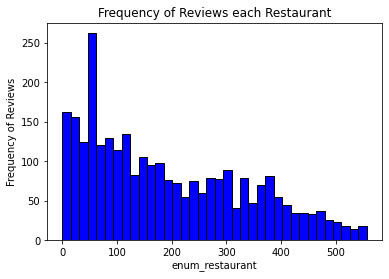

In [12]:
plt.hist(reviews['enum_restaurant'], color = 'blue', edgecolor = 'black',bins = int(180/5))
plt.title("Frequency of Reviews each Restaurant")
plt.xlabel("enum_restaurant")
plt.ylabel("Frequency of Reviews")

C:\Users\xuehu\.conda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Frequency of Restaurants')

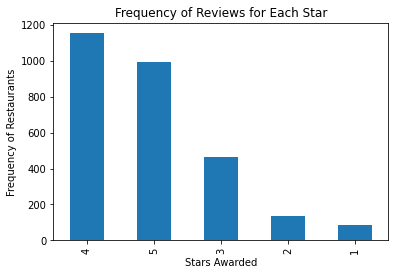

In [15]:
reviews['Stars'].value_counts().plot('bar')
plt.title("Frequency of Reviews for Each Star")
plt.xlabel("Stars Awarded")
plt.ylabel("Frequency of Restaurants")

C:\Users\xuehu\.conda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Frequency of Restaurants')

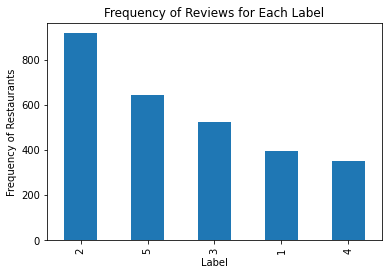

In [16]:
reviews['Label'].value_counts().plot('bar')
plt.title("Frequency of Reviews for Each Label")
plt.xlabel("Label")
plt.ylabel("Frequency of Restaurants")

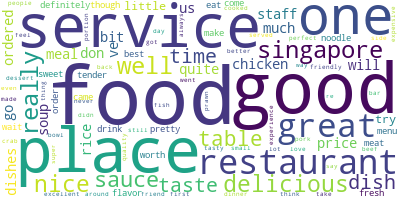

In [19]:
# Creating a WordCloud to analyse the data
long_string = ','.join(list(reviews['Review_clean'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

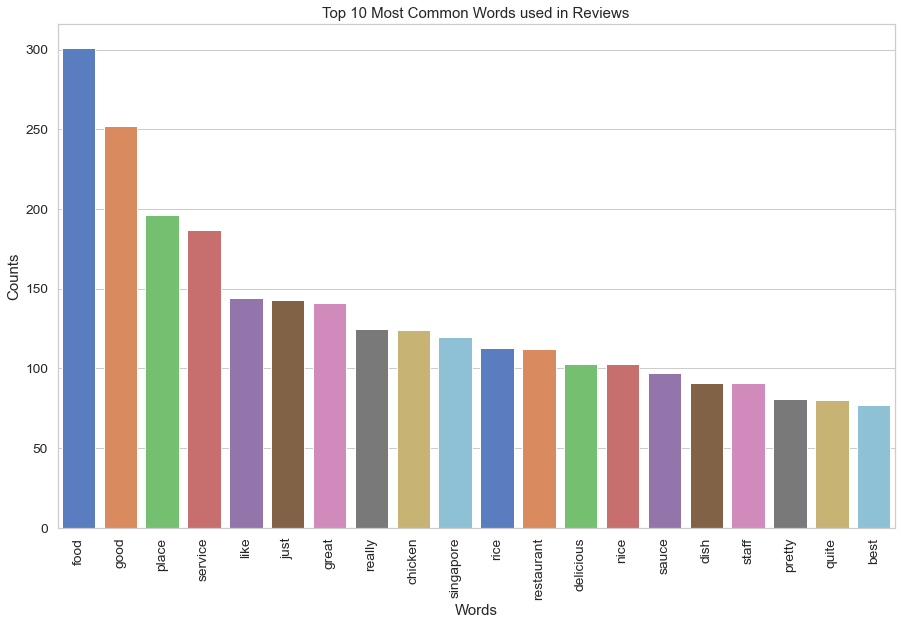

In [27]:
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='Top 10 Most Common Words used in Reviews')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='muted')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.show()
    
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(reviews['Review_clean'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [29]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

#example text text = 'What can I say about this place. The staff of these restaurants is nice and the eggplant is not bad'

# class Splitter(object):
#     """
#     split the document into sentences and tokenize each sentence
#     """
#     def __init__(self):
#         self.splitter = nltk.data.load('tokenizers/punkt/english.pickle')
#         self.tokenizer = nltk.tokenize.TreebankWordTokenizer()

#     def split(self,text):
#         # split into single sentence
#         sentences = self.splitter.tokenize(text)
#         # tokenization in each sentences
#         tokens = [self.tokenizer.tokenize(sent) for sent in sentences]
#         return tokens


class LemmatizationWithPOSTagger(object):
    def __init__(self):
        pass
    def get_wordnet_pos(self,treebank_tag):
        """
        return WORDNET POS compliance to WORDENT lemmatization (a,n,r,v) 
        """
        if treebank_tag.startswith('J'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            # As default pos in lemmatization is Noun
            return wordnet.NOUN

    def pos_tag(self,tokens):
        # find the pos tagginf for each tokens [('What', 'WP'), ('can', 'MD'), ('I', 'PRP') ....
        pos_tokens = [nltk.pos_tag(token) for token in tokens]

        # lemmatization using pos tagg   
        # convert into feature set of [('What', 'What', ['WP']), ('can', 'can', ['MD']), ... ie [original WORD, Lemmatized word, POS tag]
        pos_tokens = [ [(word, lemmatizer.lemmatize(word,self.get_wordnet_pos(pos_tag)), [pos_tag]) for (word,pos_tag) in pos] for pos in pos_tokens]
        return pos_tokens[0]

lemmatizer = WordNetLemmatizer()
splitter = Splitter()
lemmatization_using_pos_tagger = LemmatizationWithPOSTagger()

#step 1 split document into sentence followed by tokenization
# reviews["Review_tokenized"] = reviews["Review_clean"].apply(lambda x: splitter.split(x))

#step 2 lemmatization using pos tagger 
reviews["Review_pos_tagged"] = reviews["Review_clean"].apply(lambda x: lemmatization_using_pos_tagger.pos_tag(x))

IndexError: list index out of range

In [ ]:
reviews.head()

In [127]:
def get_pos_tags(column):
    for lst in column:
        for 

<generator object <genexpr> at 0x0000018E751D8480>

In [130]:
# Creating a WordCloud to analyse the data
long_string = ','.join(list(x[1] in reviews['content_pos_tagged'].iloc[0] if x[2][0] == 'NN')
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

SyntaxError: invalid syntax (<ipython-input-130-1b525335879a>, line 2)